# KNN

In [178]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [179]:
X, y = digits.data, digits.target
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [180]:
from sklearn.preprocessing import MinMaxScaler
# Initialize Normalizer with norm='l2'
from sklearn.preprocessing import Normalizer

In [189]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [190]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.987037037037037


In [191]:
#hyperparameter tuning
#we will try different values of k and choose the best one

In [202]:
results = []
k_values = range(2, 8) 

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    accuracy = accuracy_score(y_test, y_pred)  
    results.append({"k": k, "Accuracy": accuracy})  


results_table = pd.DataFrame(results)

print(results_table)

   k  Accuracy
0  2  0.983333
1  3  0.988889
2  4  0.987037
3  5  0.992593
4  6  0.994444
5  7  0.990741


In [203]:
#using scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

In [204]:
# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [206]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9925925925925926


In [208]:
# Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Display the report as a table
print("\nClassification Report:")
print(df_report)


Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   53.000000
1              1.000000  1.000000  1.000000   50.000000
2              1.000000  1.000000  1.000000   47.000000
3              0.981818  1.000000  0.990826   54.000000
4              0.983607  1.000000  0.991736   60.000000
5              0.984848  0.984848  0.984848   66.000000
6              1.000000  1.000000  1.000000   53.000000
7              1.000000  1.000000  1.000000   55.000000
8              1.000000  1.000000  1.000000   43.000000
9              0.982456  0.949153  0.965517   59.000000
accuracy       0.992593  0.992593  0.992593    0.992593
macro avg      0.993273  0.993400  0.993293  540.000000
weighted avg   0.992592  0.992593  0.992545  540.000000


In [209]:
#using normalization L1
from sklearn.preprocessing import Normalizer

# Initialize Normalizer with norm='l1'
l1_normalizer = Normalizer(norm='l1')

# Transform the data
X_l1_normalized = l1_normalizer.fit_transform(X)


In [212]:
# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_l1_normalized, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9833333333333333


In [213]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Display the report as a table
print("\nClassification Report:")
print(df_report)


Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   53.000000
1              0.909091  1.000000  0.952381   50.000000
2              1.000000  1.000000  1.000000   47.000000
3              0.981818  1.000000  0.990826   54.000000
4              1.000000  0.966667  0.983051   60.000000
5              0.985075  1.000000  0.992481   66.000000
6              1.000000  1.000000  1.000000   53.000000
7              1.000000  0.981818  0.990826   55.000000
8              0.976190  0.953488  0.964706   43.000000
9              0.982143  0.932203  0.956522   59.000000
accuracy       0.983333  0.983333  0.983333    0.983333
macro avg      0.983432  0.983418  0.983079  540.000000
weighted avg   0.984093  0.983333  0.983376  540.000000


In [215]:
#using normalization L2
from sklearn.preprocessing import Normalizer

# Initialize Normalizer with norm='l2'
l1_normalizer = Normalizer(norm='l2')

# Transform the data
X_l1_normalized = l1_normalizer.fit_transform(X)


In [216]:
# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_l2_normalized, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


In [217]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df_report = pd.DataFrame(report).transpose()

# Display the report as a table
print("\nClassification Report:")
print(df_report)


Classification Report:
              precision    recall  f1-score     support
0              1.000000  1.000000  1.000000   53.000000
1              0.909091  1.000000  0.952381   50.000000
2              1.000000  1.000000  1.000000   47.000000
3              0.981818  1.000000  0.990826   54.000000
4              0.982759  0.950000  0.966102   60.000000
5              0.985075  1.000000  0.992481   66.000000
6              1.000000  1.000000  1.000000   53.000000
7              1.000000  0.981818  0.990826   55.000000
8              0.976190  0.953488  0.964706   43.000000
9              0.982143  0.932203  0.956522   59.000000
accuracy       0.981481  0.981481  0.981481    0.981481
macro avg      0.981708  0.981751  0.981384  540.000000
weighted avg   0.982177  0.981481  0.981493  540.000000


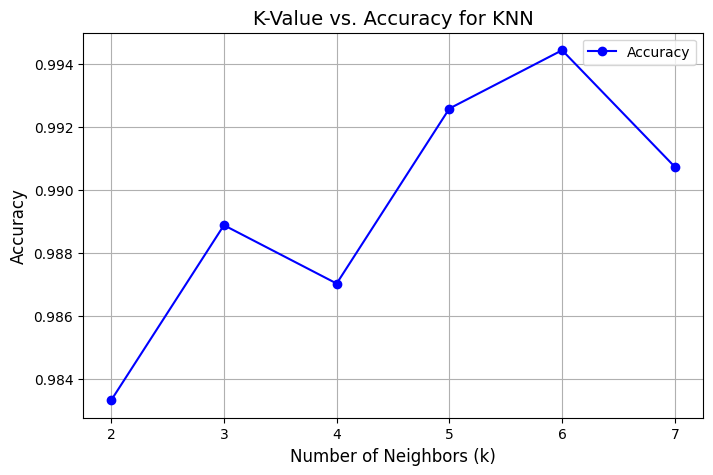

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Data (from your provided results)
data = {"k": [2, 3, 4, 5, 6, 7], 
        "Accuracy": [0.983333, 0.988889, 0.987037, 0.992593, 0.994444, 0.990741]}

# Convert data to DataFrame
results_table = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(results_table["k"], results_table["Accuracy"], marker='o', linestyle='-', color='b', label="Accuracy")

# Adding titles and labels
plt.title("K-Value vs. Accuracy for KNN", fontsize=14)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(results_table["k"])  # Ensures all k values are shown on the x-axis

# Show the plot
plt.show()
